In [34]:
from flashbax.vault import Vault
from ipd_squared import get_latest_folder
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp


UsageError: Line magic function `%%matplotlib` not found.


In [35]:
%matplotlib inline

In [36]:
vault_id = get_latest_folder('./experiment_results/ff_ippo')
v = Vault(
    rel_dir=f"experiment_results/ff_ippo/{vault_id}",
    vault_name="ipd_squared",
    vault_uid=vault_id,
)
buffer_state = v.read()

Loading vault found at /home/app/mava/experiment_results/ff_ippo/20250223173522/ipd_squared/20250223173522


In [37]:
buffer_state.experience["action"].shape

(128, 3840, 4)

In [38]:
actions = buffer_state.experience["action"]
rewards = buffer_state.experience["reward"]
action_mask = buffer_state.experience["legal_action_mask"]

In [39]:
action_sum_per_agent = actions.reshape((-1, 4)).sum(axis=0)
action_sum_per_agent

Array([457666, 459702, 459075, 457446], dtype=int32)

In [40]:
jnp.bincount(actions.flatten())

Array([ 132191, 1833889], dtype=int32)

[-424822.5  -424375.5  -426564.72 -426337.28]


<BarContainer object of 4 artists>

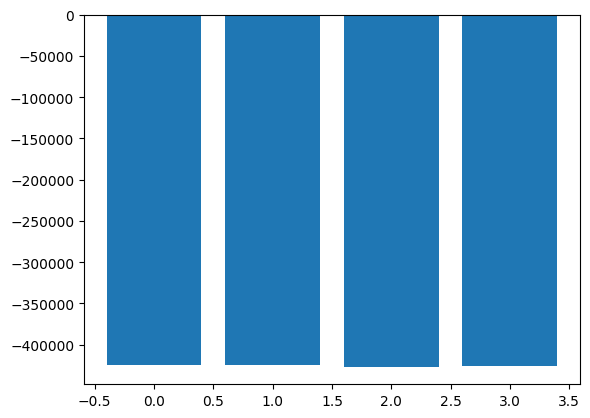

In [41]:
rewards_sum_per_agent = rewards.reshape((-1, 4)).sum(axis=0)
print(rewards_sum_per_agent)
plt.bar(jnp.arange(4), rewards_sum_per_agent)

In [42]:
rewards.reshape(-1, 4).cumsum(0)

Array([[-9.9547774e-01, -1.0045222e+00, -9.5485348e-01, -1.0451465e+00],
       [-3.3244078e+00, -2.6755922e+00,  1.6755502e+00,  3.2444978e-01],
       [-1.9360840e+00, -6.3915730e-02, -5.0012660e-01, -1.4998735e+00],
       ...,
       [-4.2482047e+05, -4.2437353e+05, -4.2656206e+05, -4.2633597e+05],
       [-4.2482134e+05, -4.2437466e+05, -4.2656331e+05, -4.2633672e+05],
       [-4.2482250e+05, -4.2437550e+05, -4.2656478e+05, -4.2633725e+05]],      dtype=float32)

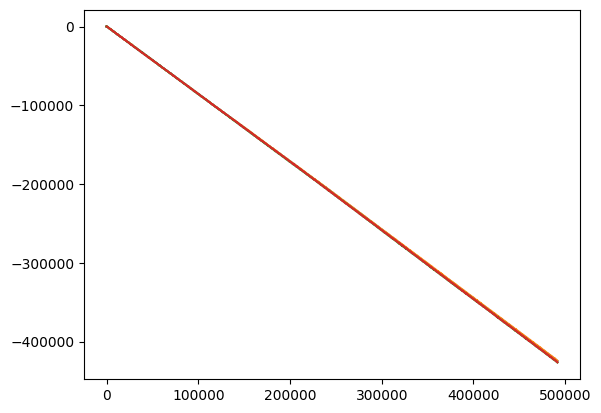

In [43]:
plt.plot(rewards.reshape((-1, 4)).cumsum(0))

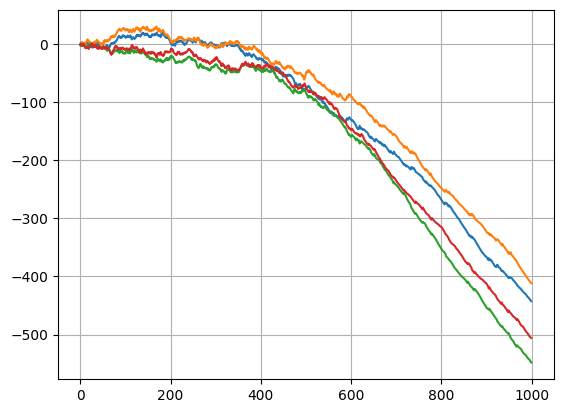

In [44]:
plt.plot(rewards.reshape((-1, 4)).cumsum(0)[:1000])
plt.grid()

In [23]:
jax.tree.map(
    lambda x: x.reshape(-1, x.shape[-1])[:3],
    (jnp.int8(action_mask), actions, rewards),
)

(Array([], shape=(0, 2), dtype=int8),
 Array([], shape=(0, 4), dtype=int32),
 Array([], shape=(0, 4), dtype=float32))